# DS-SF-23 | Codealong 03 | Introduction to Exploratory Data Analysis

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-03-start.csv'), index_col = 'ID')

In [4]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,2.0,1299.0,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,1.0,264.0,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,1.0,691.0,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,3.0,1738.0,2299.0,1976.0


## Part A
- `.mean()`
- `.var()`, `.std()`

### `Series.mean()` - Compute the `Series` mean value

In [5]:
df.SalePrice.mean()

1397422.943

In [6]:
df.Size.mean()

1641.3009307135471

`Size` has nan values that `.mean()` skips.

In [7]:
df.IsAStudio.mean()

0.029411764705882353

About 3% of the properties sold are studios.  (Note that we are "dropping" the properties with no studio information)

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [8]:
df.mean()

SalePrice      1.397423e+06
IsAStudio      2.941176e-02
BedCount       2.572967e+00
BathCount      1.977548e+00
Size           1.641301e+03
LotSize        3.020640e+03
BuiltInYear    1.947533e+03
dtype: float64

`DataFrame.mean()` only applies to numerical columns.  Address and date of sales aren't included.

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [9]:
df.var()

SalePrice      3.015131e+12
IsAStudio      2.857569e-02
BedCount       1.564729e+00
BathCount      1.277654e+00
Size           1.054762e+06
LotSize        8.142064e+06
BuiltInYear    1.445639e+03
dtype: float64

In [10]:
df.BedCount.var()

1.5647293928888621

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [11]:
df.std()

SalePrice      1.736413e+06
IsAStudio      1.690435e-01
BedCount       1.250891e+00
BathCount      1.130334e+00
Size           1.027016e+03
LotSize        2.853430e+03
BuiltInYear    3.802156e+01
dtype: float64

In [12]:
df.BedCount.std()

1.2508914392899417

## Part B
- `.median()`
- `.count()`, `.dropna()`, `.isnull()`
- `.min()`, `.max()`
- `.quantile()`
- `.describe()`

### `.median()` - Compute the median value

In [13]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [14]:
df.SalePrice.median()

1100000.0

### `.count()` - Compute the number of rows/observations and `.sum()` - Compute the sum and the values

In [18]:
df.BuiltInYear.mode()
df.BuiltInYear.count()

975

In [16]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
BedCount        836
BathCount       942
Size            967
LotSize         556
BuiltInYear     975
dtype: int64

In [17]:
df.IsAStudio.count()

986

`count()` counts the number of non-nan values:

In [28]:
len(df.IsAStudio.dropna())
df.IsAStudio.dropna().sum()

29.0

In [29]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [ ]:
df.IsAStudio.sum()

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [30]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                               1
IsAStudio                                               0
BedCount                                                1
BathCount                                               1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

In [31]:
df[df.SalePrice == df.SalePrice.min()]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,1.0,0.0,7.0,6.0,2904.0,2482.0,1900.0


A 7 bedrooms/6 bathrooms house for $1.  What a bargain!

In [32]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                       3.27e+07
IsAStudio                              1
BedCount                               9
BathCount                             14
Size                               11500
LotSize                            47916
BuiltInYear                         2015
dtype: object

In [33]:
df[df.SalePrice == df.SalePrice.max()]

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32700000.0,0.0,NaN,1.0,1100.0,1694.0,1900.0


### `.quantile()` - Compute values at the given quantile

In [34]:
df.quantile(.5) 

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [35]:
df.median()

SalePrice      1100000.0
IsAStudio            0.0
BedCount             2.0
BathCount            2.0
Size              1350.0
LotSize           2622.0
BuiltInYear       1939.0
dtype: float64

In [36]:
df.quantile(.25) 

SalePrice      800000.0
IsAStudio           0.0
BedCount            2.0
BathCount           1.0
Size             1027.5
LotSize          2375.0
BuiltInYear      1912.0
dtype: float64

In [37]:
df.quantile(.75)

SalePrice      1532500.0
IsAStudio            0.0
BedCount             3.0
BathCount            2.0
Size              1947.5
LotSize           3049.0
BuiltInYear       1986.0
dtype: float64

### `.describe()` - Generate various summary statistics

In [38]:
df.describe()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
count,1.000000e+03,986.000000,836.000000,942.000000,967.000000,556.000000,975.000000
mean,1.397423e+06,0.029412,2.572967,1.977548,1641.300931,3020.640288,1947.533333
std,1.736413e+06,0.169043,1.250891,1.130334,1027.016175,2853.430139,38.021563
min,1.000000e+00,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,8.000000e+05,0.000000,2.000000,1.000000,1027.500000,2375.000000,1912.000000
50%,1.100000e+06,0.000000,2.000000,2.000000,1350.000000,2622.000000,1939.000000
75%,1.532500e+06,0.000000,3.000000,2.000000,1947.500000,3049.000000,1986.000000
max,3.270000e+07,1.000000,9.000000,14.000000,11500.000000,47916.000000,2015.000000


In [39]:
df.SalePrice.describe()

count    1.000000e+03
mean     1.397423e+06
std      1.736413e+06
min      1.000000e+00
25%      8.000000e+05
50%      1.100000e+06
75%      1.532500e+06
max      3.270000e+07
Name: SalePrice, dtype: float64

## Part C
- Boxplots

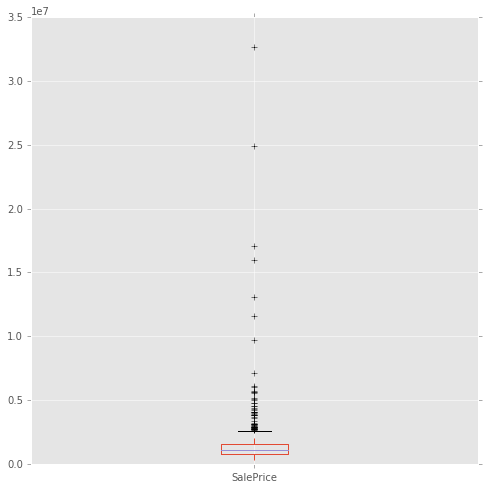

In [40]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

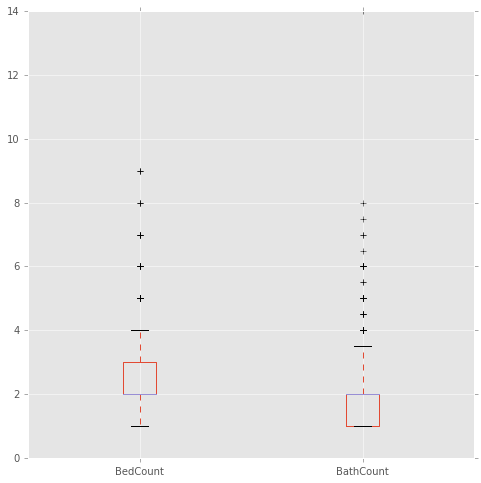

In [41]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'box', figsize = (8, 8))

## Part D
- Histograms

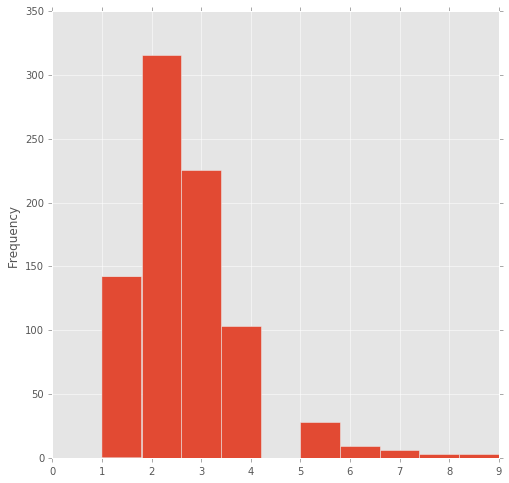

In [42]:
df.BedCount.plot(kind = 'hist', figsize = (8, 8))

In [45]:
df.BedCount.value_counts() 

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: BedCount, dtype: int64

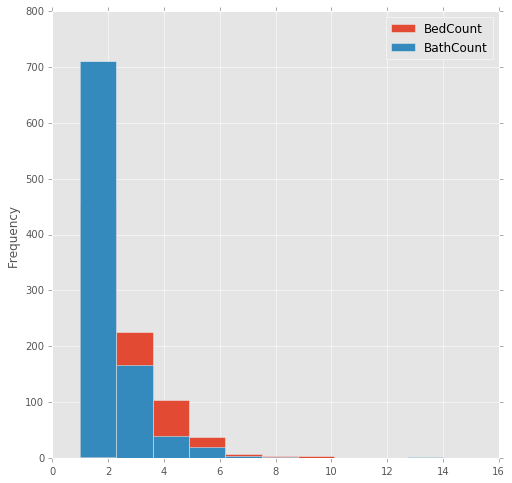

In [43]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'hist', figsize = (8, 8))

## Part E
- `.mode()`

### `.mode()` - Compute the mode value(s)

In [46]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1100000.0,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html): Gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with nan.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.  

In [47]:
df.Address[df.Address == '1 Mono St # B, San Francisco, CA']

ID
59700333    1 Mono St # B, San Francisco, CA
59779608    1 Mono St # B, San Francisco, CA
Name: Address, dtype: object

In [48]:
df.Address[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

ID
123597964     829 Folsom St UNIT 906, San Francisco, CA
2121978635    829 Folsom St UNIT 906, San Francisco, CA
Name: Address, dtype: object

In [49]:
len(df[df.DateOfSale == '11/20/15'])

47

In [ ]:
(df.DateOfSale == '11/20/15').sum()

In [50]:
bed_counts = df.BedCount.dropna().unique()

In [51]:
bed_counts

array([ 1.,  2.,  3.,  5.,  4.,  7.,  6.,  8.,  9.])

In [52]:
for bed_count in np.sort(bed_counts):
    home_count = (df.BedCount == bed_count).sum()
    print '{} homes have {} bedrooms'.format(home_count, bed_count)

142 homes have 1.0 bedrooms
316 homes have 2.0 bedrooms
226 homes have 3.0 bedrooms
103 homes have 4.0 bedrooms
28 homes have 5.0 bedrooms
9 homes have 6.0 bedrooms
6 homes have 7.0 bedrooms
3 homes have 8.0 bedrooms
3 homes have 9.0 bedrooms


Note: That's the same information we got from the histogram above.

In [65]:
df.BedCount.value_counts()

2.0    316
3.0    226
1.0    142
4.0    103
5.0     28
6.0      9
7.0      6
9.0      3
8.0      3
Name: BedCount, dtype: int64

In [61]:
df.BedCount.isnull().sum()

164

Careful on checking for `nan` values:

In [ ]:
(df.BedCount == np.nan).sum()

## Part F
- `.corr()`
- Heatmaps
- Scatter plots
- Scatter matrices

In [ ]:
df.corr()

### Heatmaps

In [ ]:
plt.matshow(df.corr())

In [ ]:
corr = df.corr()

figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(df.corr()))
subplot.set_xticklabels(corr.columns, rotation = 90)
subplot.set_yticklabels(corr.columns)
plt.show()

### Scatter plots

In [ ]:
df[ ['BedCount', 'BathCount'] ].plot(kind = 'scatter', x = 'BedCount', y = 'BathCount', s = 100, figsize = (8, 8))

### Scatter matrices

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['BedCount', 'BathCount'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))